<a href="https://colab.research.google.com/github/Ganeshwalimbe/Predictive-Modeling-for-Customer-Churn/blob/main/Predictive_Modeling_for_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Predictive Modeling for Customer Churn**

**Objective:**

The objective of this assignment is to build a predictive model that can predict customer churn for a given company. Using machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.


## **Data description:**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Input variables: # bank client data:

1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [279]:
#importing neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/bank.csv',sep=';')
data=data.drop('duration',axis=1)

In [281]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


In [282]:
data.shape

(4521, 16)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


# **Data cleaning and preprocessing**

In [284]:
#checking if missing values are present in dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**There are no missing values in the dataset**

In [285]:
#checking if duplicates are present
data.duplicated().sum()

0

# **Checking if data is imbalanced**

In [286]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

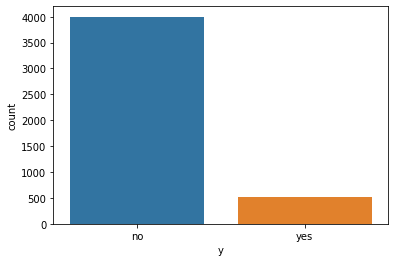

In [287]:
sns.countplot(x='y',data=data)

**We can see that the dataset is imbalanced .So I am going to use oversampling technique to make the data balanced dataset.**

In [288]:
majority_class=data[data.y=='no']
minority_class=data[data.y=='yes']

In [289]:
majority_class.shape

(4000, 16)

In [290]:
minority_class.shape

(521, 16)

In [291]:
y_no_count,y_yes_count=data.y.value_counts()

In [292]:
y_class_yes=minority_class.sample(y_no_count,replace=True)
balanced_data=pd.concat([majority_class,y_class_yes],axis=0)

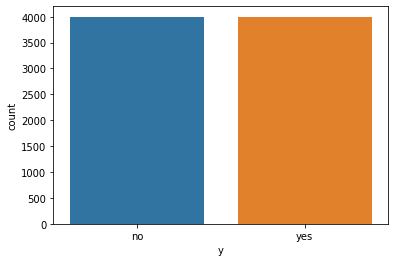

In [293]:
sns.countplot(x='y',data=balanced_data)

**Now the dataset looks balanced so we can proceed further**

In [294]:
balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


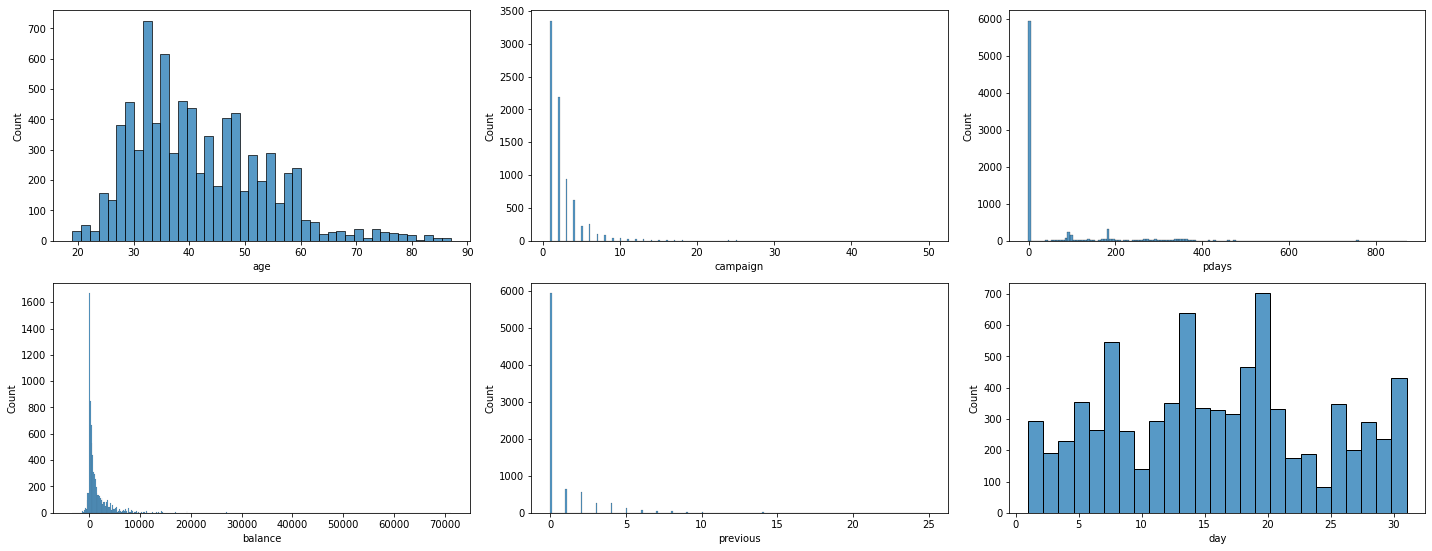

In [295]:
numerical_variables = ['age','campaign','pdays','balance','previous','day']
#plotting histogram of all the numerical variables
fig=plt.figure(figsize=(20,30))

for i in range(len(numerical_variables)):
    fig.add_subplot(8, 3, i+1)
    
    sns.histplot(balanced_data[numerical_variables[i]])
plt.tight_layout()
plt.show()

## **We can see that the data is not evenly distributed, therefore we need to standardize**

In [296]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
balanced_data['pdays2']=balanced_data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
balanced_data['pdays']=balanced_data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
balanced_data['pdays']=balanced_data['pdays'].astype(int)
balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,pdays2
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no,1


## **Convering categorical variables to numerical variables**

In [297]:
#convering categorical variables to numerical variables
balanced_data['poutcome'] = balanced_data['poutcome'].map({'failure': -1,'unknown': 0,'success': 1})
balanced_data['default'] = balanced_data['default'].map({'yes': -1,'unknown': 0,'no': 1})
balanced_data['housing'] = balanced_data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
balanced_data['loan'] = balanced_data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [299]:
balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,pdays2
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,1,-1,0,0.0,no,1
1,33,services,married,secondary,1,4789,-1,-1,cellular,11,may,1,339,4,-1.0,no,1
2,35,management,single,tertiary,1,1350,-1,1,cellular,16,apr,1,330,1,-1.0,no,1
3,30,management,married,tertiary,1,1476,-1,-1,unknown,3,jun,4,-1,0,0.0,no,1
4,59,blue-collar,married,secondary,1,0,-1,1,unknown,5,may,1,-1,0,0.0,no,1


In [300]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month']
processed_data = pd.get_dummies(balanced_data,columns=nominal)
processed_data['y']=processed_data['y'].map({'yes': 1,'no': 0})
processed_data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,1787,1,1,19,1,-1,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,-1,-1,11,1,339,4,-1.0,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,-1,1,16,1,330,1,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,30,1,1476,-1,-1,3,4,-1,0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,59,1,0,-1,1,5,1,-1,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [301]:
numerical_index=[0,2,5,6,8]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
processed_data[processed_data.columns[numerical_index]] = scaler.fit_transform(processed_data[processed_data.columns[numerical_index]])

In [302]:
processed_data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.161765,1,0.068455,1,1,0.600000,0.000000,-1,0.00,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.205882,1,0.108750,-1,-1,0.333333,0.000000,339,0.16,-1.0,...,0,0,0,0,0,0,1,0,0,0
2,0.235294,1,0.062590,-1,1,0.500000,0.000000,330,0.04,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,1,0.064281,-1,-1,0.066667,0.061224,-1,0.00,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.588235,1,0.044469,-1,1,0.133333,0.000000,-1,0.00,0.0,...,0,0,0,0,0,0,1,0,0,0


In [303]:
processed_data.shape

(8000, 46)

In [304]:
processed_data.isnull().sum()

age                      0
default                  0
balance                  0
housing                  0
loan                     0
day                      0
campaign                 0
pdays                    0
previous                 0
poutcome               484
y                        0
pdays2                   0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
marital_divorced         0
marital_married          0
marital_single           0
education_primary        0
education_secondary      0
education_tertiary       0
education_unknown        0
contact_cellular         0
contact_telephone        0
contact_unknown          0
month_apr                0
month_aug                0
month_dec                0
m

In [305]:
processed_data=processed_data.dropna()

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [307]:
x=processed_data.drop('y',axis=1)
y=processed_data.y.values

**Splitting the dataset into training and testing dataset**

In [308]:
x_train, x_test , y_train, y_test = train_test_split(x, y , train_size=0.75,test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(5637, 45)
(1879, 45)


# **Logistic regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [309]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression(fit_intercept=True, max_iter=10000)
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [310]:
# Getting the predicted probabilities
train_preds = logistic.predict_proba(x_train)
test_preds = logistic.predict_proba(x_test)

In [311]:
train_preds = logistic.predict_proba(x_train)[:,1]
test_preds = logistic.predict_proba(x_test)[:,1]

In [312]:
# Get the predicted classes
train_class_preds = logistic.predict(x_train)
test_class_preds = logistic.predict(x_test)

In [313]:
#importing packeges for evaaluation of model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import metrics

In [314]:
#defining function to find the training and testing accuracy 
def print_training_accuracy(actual, predicted):
  print('Training accuracy is {}'.format(accuracy_score(actual, predicted)))
def print_testing_accuracy(actual,predicted):
  print('Testing accuracy  is {}'.format(accuracy_score(actual, predicted)))

In [315]:
#getting training and testing accuracy of logisic regression 
print_training_accuracy(train_class_preds,y_train)
#
print_testing_accuracy(test_class_preds,y_test)

Training accuracy is 0.6805038140855064
Testing accuracy  is 0.6679084619478446


In [316]:
#evaluation metrics of logistic regression
print(metrics.classification_report(train_class_preds, y_train))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3227
           1       0.61      0.70      0.65      2410

    accuracy                           0.68      5637
   macro avg       0.68      0.68      0.68      5637
weighted avg       0.69      0.68      0.68      5637



In [317]:
#evaluation metrics of logistic regression
print(metrics.classification_report(test_class_preds, y_test))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1079
           1       0.60      0.69      0.64       800

    accuracy                           0.67      1879
   macro avg       0.67      0.67      0.67      1879
weighted avg       0.68      0.67      0.67      1879



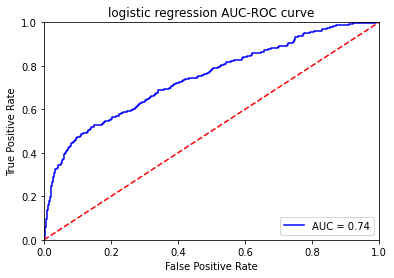

In [318]:
#plotting AUC ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic regression without hyperparameter tunning giving us testing accuracy of 68% to predict customer churn**

# **Logistic regression (hyperparameter tunning)**

In [319]:
#performing hyperparameter tunning on logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
logit= LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logit, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [320]:
#getting predicted values of y train and y test
y_pred_train_lr_ht=grid_search.predict(x_train)
y_pred_test_lr_ht=grid_search.predict(x_test)

In [321]:
#getting training and testing accuracy of decision trees classifier
print_training_accuracy(y_pred_train_lr_ht,y_train)
#
print_testing_accuracy(y_pred_test_lr_ht,y_test)

Training accuracy is 0.680681213411389
Testing accuracy  is 0.6753592336349122


In [322]:
#evaluation metrics of logistic regression
print(metrics.classification_report(y_pred_test_lr_ht, y_test))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1061
           1       0.61      0.69      0.65       818

    accuracy                           0.68      1879
   macro avg       0.67      0.68      0.67      1879
weighted avg       0.68      0.68      0.68      1879



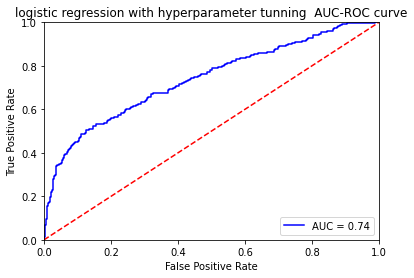

In [323]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression with hyperparameter tunning  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic regression after hyperparameter tunning is giving testing accuracy of 68% to predict customer churn**

# **Gradient Boosting**
Gradient Boosting Machine (GBM) is one of the most popular forward learning ensemble methods in machine learning. It is a powerful technique for building predictive models for regression and classification tasks.

In [334]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [335]:
#getting predicted values of y train and y test
train_preds_gb =  gb_classifier.predict(x_train)
test_preds_gb  = gb_classifier.predict(x_test)

In [336]:
#getting training and testing accuracy of random forest classifier
print_training_accuracy(train_preds_gb,y_train)
#
print_testing_accuracy(test_preds_gb,y_test)

Training accuracy is 0.7951037786056413
Testing accuracy  is 0.7732836615220862


In [337]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(train_preds_gb, y_train))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      3171
           1       0.74      0.82      0.78      2466

    accuracy                           0.80      5637
   macro avg       0.79      0.80      0.79      5637
weighted avg       0.80      0.80      0.80      5637



In [338]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(test_preds_gb, y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.78      1027
           1       0.73      0.79      0.76       852

    accuracy                           0.77      1879
   macro avg       0.77      0.77      0.77      1879
weighted avg       0.78      0.77      0.77      1879



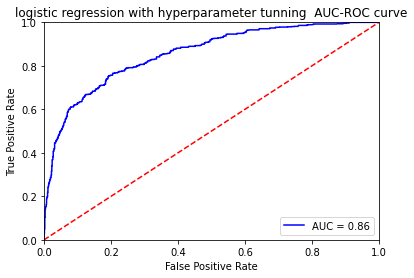

In [339]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gb_classifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression with hyperparameter tunning  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Gradient boosting algorithm has given testing accuracy of 76% to predict the customer churn.**

# **Random forest classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time

In [324]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [325]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [326]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(x_train)
test_preds_rf  = rf.predict(x_test)

In [327]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(train_preds_rf, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2888
           1       1.00      1.00      1.00      2749

    accuracy                           1.00      5637
   macro avg       1.00      1.00      1.00      5637
weighted avg       1.00      1.00      1.00      5637



In [328]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       923
           1       1.00      0.97      0.98       956

    accuracy                           0.98      1879
   macro avg       0.98      0.98      0.98      1879
weighted avg       0.98      0.98      0.98      1879



In [329]:
#getting training and testing accuracy of random forest classifier
print_training_accuracy(train_preds_rf,y_train)
#
print_testing_accuracy(test_preds_rf,y_test)

Training accuracy is 1.0
Testing accuracy  is 0.9819052687599787


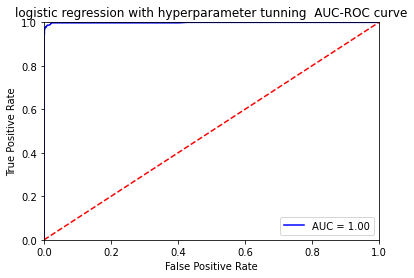

In [330]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression with hyperparameter tunning  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Random forest model has given testing accuracy of 98% to predict customer churn**

In [331]:
#finding important features according to random forest classifier
importances = rf.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [332]:
decending_importance_df=importance_df.sort_values('Feature Importance',ascending=False).head(10)
decending_importance_df

,Feature,Feature Importance
2,balance,0.149576
0,age,0.132317
5,day,0.119834
6,campaign,0.066106
7,pdays,0.035131
9,poutcome,0.034394
8,previous,0.026298
3,housing,0.023828
32,contact_unknown,0.022444
30,contact_cellular,0.021224


<BarContainer object of 10 artists>

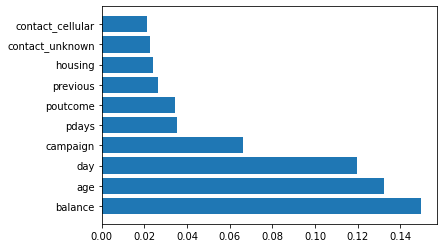

In [333]:
#plotting horizontal barplot according to feature importance
plt.barh('Feature','Feature Importance',data=decending_importance_df)

# **Summary:**
1.  Among all the models Random forest model has given highest accuracy of 98 %
therefore we can use random forest model for the prediction of customer churn.
2. The top 5 important features to predict the customer churn according to random forest model are balance,age,day,campaign and pdays.